1. Продажи игр ( ссылка на Kaggle )

Цель: найти наиболее перспективный жанр игры для потенциальной разработки.

Гипотеза: есть жанр игр (возможно в связке с платформой или чтото еще), который
продается лучше.

In [1]:
import pandas as pd

df=pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# 1

In [2]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


Год должен быть целым числом.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропусков не так много, можно удалить строки с пропусками.

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df['Year']=df['Year'].astype(int)
df.dtypes

<ipython-input-7-ad6b154b13f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].astype(int)


,0
Rank,int64
Name,object
Platform,object
Year,int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [11]:
print(df.duplicated().sum())

0


Дубликатов нет!

# 2

In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
stats = df[numeric_cols].agg(['mean', 'median', 'std', 'sum', 'max'])
print("Основные статистики по продажам:")
stats

Основные статистики по продажам:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,0.265647,0.147731,0.078833,0.048426,0.540910
median,0.080000,0.020000,0.000000,0.010000,0.170000
std,0.822432,0.509303,0.311879,0.190083,1.567345
sum,4327.650000,2406.690000,1284.270000,788.910000,8811.970000
max,41.490000,29.020000,10.220000,10.570000,82.740000


Средние продажи варьируются от 0.27 млн (NA_Sales) до 0.54 млн (Global_Sales)

Медианные значения значительно ниже средних, что может указывать на наличие хитов с очень высокими продажами

Стандартное отклонение высокое, что подтверждает неравномерность продаж

Проанализирую по жанрам

In [19]:
genre_stats = df.groupby('Genre')[numeric_cols].agg(['mean', 'median', 'sum'])
print("Статистики продаж по жанрам:")
genre_stats.sort_values(by=('Global_Sales', 'sum'), ascending=False)

Статистики продаж по жанрам:


NA_Sales                 EU_Sales                 JP_Sales  \
                  mean median     sum      mean median     sum      mean   
Genre                                                                      
Action        0.265078   0.10  861.77  0.158868   0.03  516.48  0.048800   
Sports        0.290838   0.11  670.09  0.161172   0.02  371.34  0.058490   
Shooter       0.448643   0.12  575.16  0.242161   0.05  310.45  0.029782   
Role-Playing  0.222109   0.04  326.50  0.127599   0.01  187.57  0.238293   
Platform      0.509703   0.14  445.99  0.229314   0.05  200.65  0.149314   
Misc          0.235421   0.08  396.92  0.125605   0.01  211.77  0.063268   
Racing        0.291371   0.10  356.93  0.192906   0.04  236.31  0.046212   
Fighting      0.264043   0.08  220.74  0.119617   0.03  100.00  0.104246   
Simulation    0.214363   0.07  181.78  0.133278   0.01  113.02  0.074929   
Puzzle        0.214053   0.05  122.01  0.088632   0.01   50.52  0.099439   
Adventure     0.080008   0.00  101.93  0.050031   0.00   63.74  0.040808   
Strategy      0.101239   0.00   67.83  0.066925   0.01   44.84  0.073284   

                            Other_Sales                Global_Sales         \
             median     sum        mean median     sum         mean median   
Genre                                                                        
Action         0.00  158.65    0.056881   0.01  184.92     0.529942  0.190   
Sports         0.00  134.76    0.057574   0.01  132.65     0.568247  0.220   
Shooter        0.00   38.18    0.079485   0.02  101.90     0.800468  0.230   
Role-Playing   0.05  350.29    0.040395   0.01   59.38     0.628456  0.190   
Platform       0.00  130.65    0.058869   0.01   51.51     0.947577  0.280   
Misc           0.00  106.67    0.043843   0.01   73.92     0.468488  0.160   
Racing         0.00   56.61    0.062596   0.01   76.68     0.593273  0.190   
Fighting       0.02   87.15    0.043289   0.01   36.19     0.531160  0.210   
Simulation     0.00   63.54    0.036981   0.01   31.36     0.459882  0.160   
Puzzle         0.00   56.68    0.021877   0.01   12.47     0.424930  0.105   
Adventure      0.01   51.99    0.013108   0.00   16.70     0.184137  0.060   
Strategy       0.00   49.10    0.016761   0.00   11.23     0.258612  0.090   

                       
                  sum  
Genre                  
Action        1722.84  
Sports        1309.24  
Shooter       1026.20  
Role-Playing   923.83  
Platform       829.13  
Misc           789.87  
Racing         726.76  
Fighting       444.05  
Simulation     389.98  
Puzzle         242.21  
Adventure      234.59  
Strategy       173.27

Топ-3 жанра по общим продажам:

1.   Action (суммарные продажи 1723 млн)
2.   Sports (1309 млн)
3.   Shooter (1023 млн)


Интересно посмотреть в связке жанр-платформа.

In [20]:
genre_platform = df.groupby(['Genre', 'Platform'])['Global_Sales'].sum().reset_index()
top_combinations = genre_platform.sort_values('Global_Sales', ascending=False).head(10)
print("Топ-10 комбинаций жанр-платформа по продажам:")
top_combinations

Топ-10 комбинаций жанр-платформа по продажам:


,Genre,Platform,Global_Sales
13,Action,PS3,304.02
265,Sports,Wii,289.95
219,Shooter,X360,277.23
12,Action,PS2,272.43
258,Sports,PS2,262.64
21,Action,X360,239.67
93,Misc,Wii,217.43
210,Shooter,PS3,195.80
158,Racing,PS2,154.21
76,Misc,DS,137.67


Наиболее успешные комбинации:

1. Action на PS3

2. Sports на Wii

3. Shooter на X360

Платформы Sony (PS2, PS3) доминируют в топе

Предварительные выводы по нашей основной гипотезе:

Наиболее перспективный жанр: Action - лидер по общим продажам, стабильный спрос.

Рекомендуемая платформа - PlayStation.

# 3

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Распределение продаж по жанрам (ТОП-10)

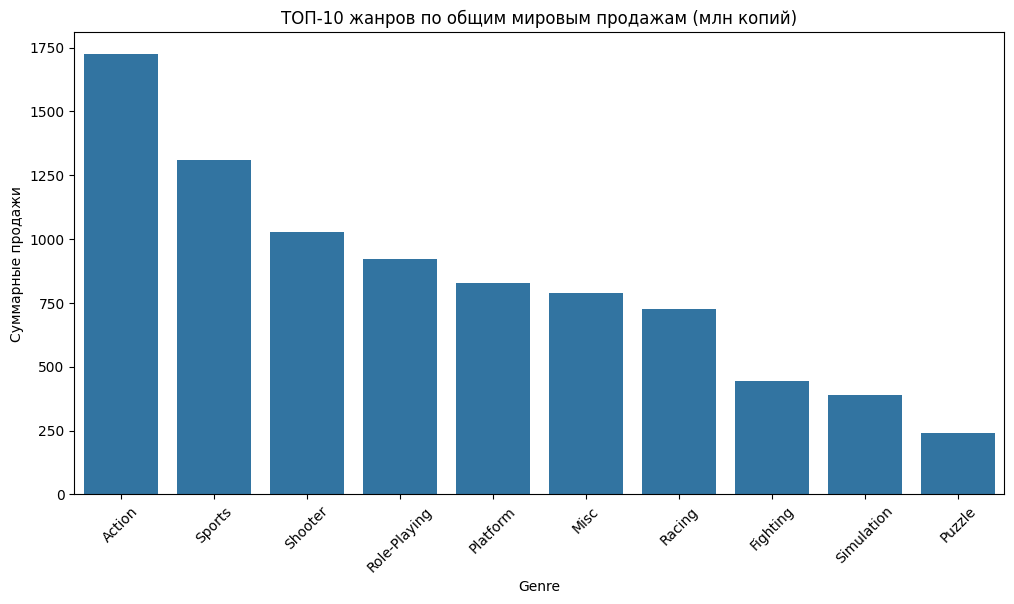

In [28]:
plt.figure(figsize=(12, 6))
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('ТОП-10 жанров по общим мировым продажам (млн копий)')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.show()

Action и Sports - безусловные лидеры.

Динамика продаж по годам (с разбивкой по жанрам)

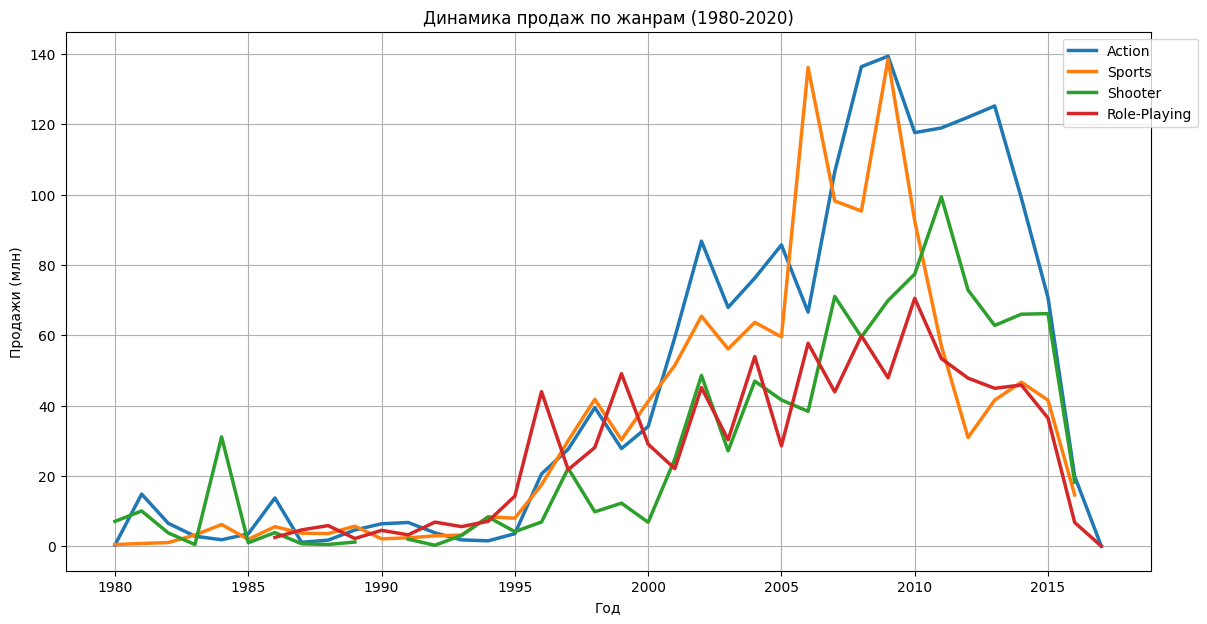

In [29]:
plt.figure(figsize=(14, 7))
year_genre = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()
year_genre[['Action', 'Sports', 'Shooter', 'Role-Playing']].plot(ax=plt.gca(), linewidth=2.5)
plt.title('Динамика продаж по жанрам (1980-2020)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Год')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Action-игры стабильно лидируют, хотя в некоторые годы Sports выбивались в лидеры. Заметен спад Sports после 2010.

Лучшие издатели (ТОП-15)

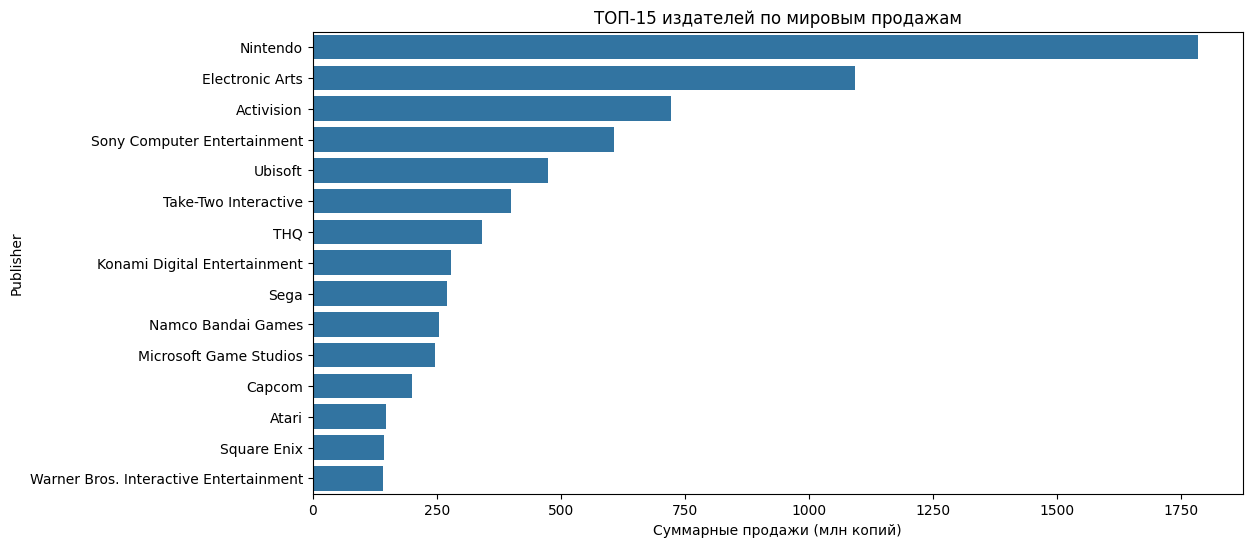

In [33]:
plt.figure(figsize=(12, 6))
top_pubs = df.groupby('Publisher')['Global_Sales'].sum().nlargest(15)
sns.barplot(y=top_pubs.index, x=top_pubs.values)
plt.title('ТОП-15 издателей по мировым продажам')
plt.xlabel('Суммарные продажи (млн копий)')
plt.show()

Nintendo и Electronic Arts доминируют с большим отрывом.

Boxplot продаж по жанрам

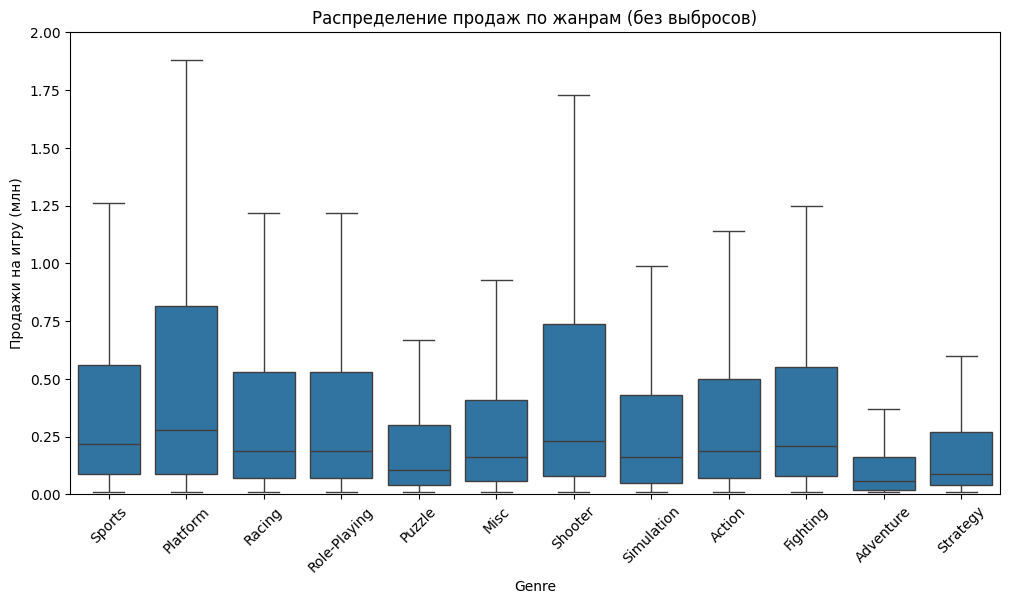

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales', showfliers=False)
plt.ylim(0, 2)
plt.title('Распределение продаж по жанрам (без выбросов)')
plt.xticks(rotation=45)
plt.ylabel('Продажи на игру (млн)')
plt.show()

 Platform и Shooter имеют самые высокие медианные продажи на игру. У них также самый широкий разброс.

Если мы планируем выходить на определённый рынок, важно учесть особенности той или иной страны.

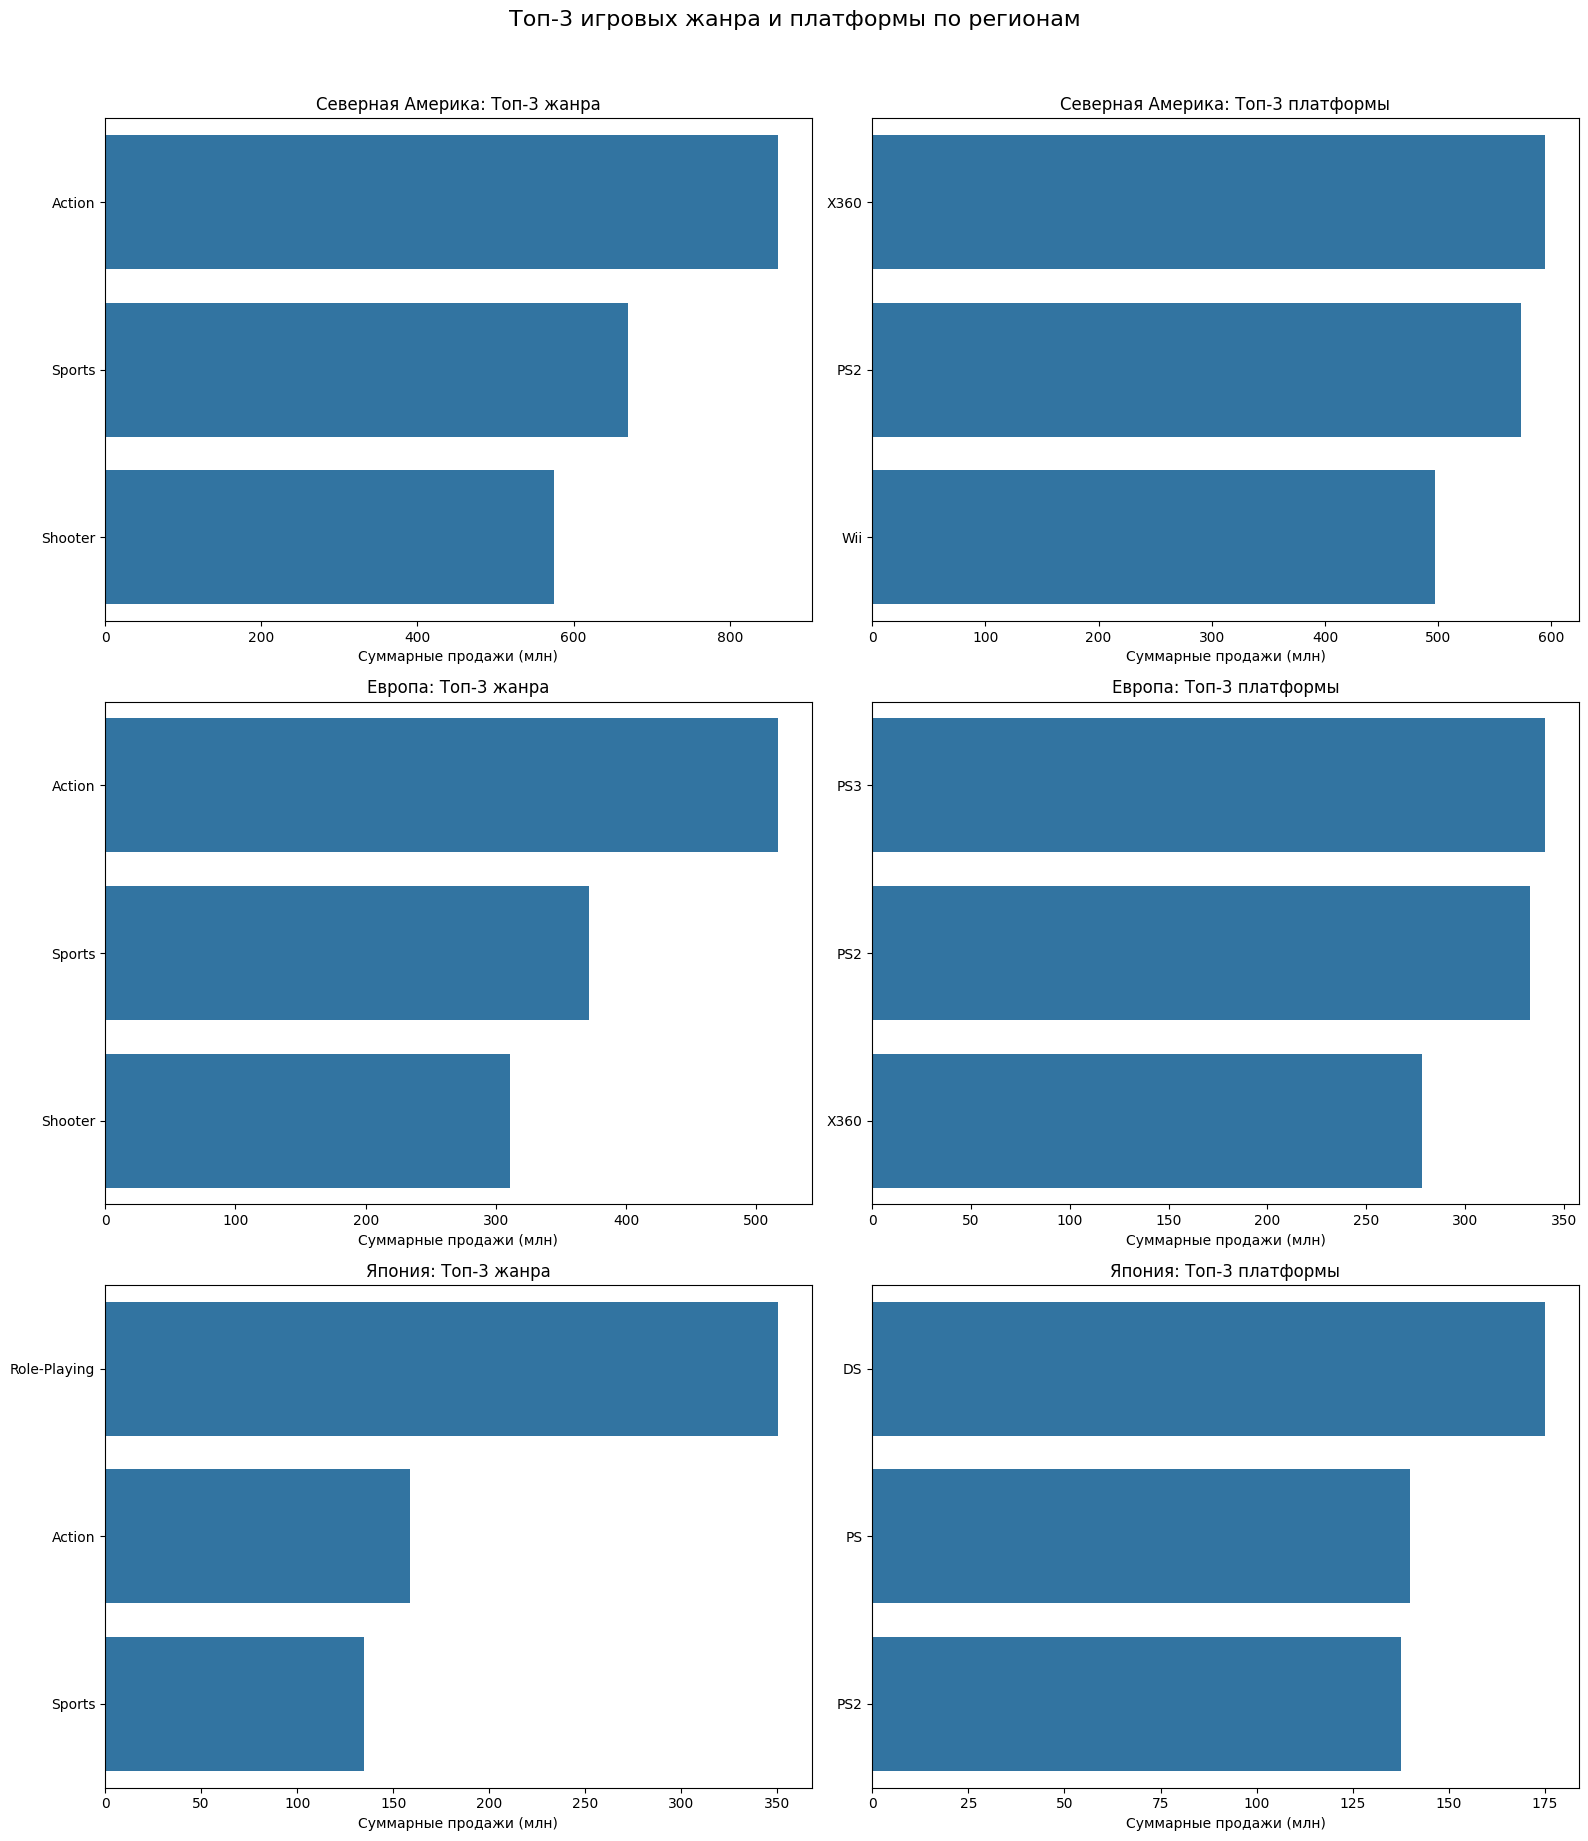

In [37]:
# Создаем субплотовую сетку
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Топ-3 игровых жанра и платформы по регионам', fontsize=16, y=1.02)

# Регионы для анализа
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales']
region_names = ['Северная Америка', 'Европа', 'Япония']

for i, (region, name) in enumerate(zip(regions, region_names)):
    # Топ-3 жанра для региона
    top_genres = (
        df.groupby('Genre')[region]
        .sum()
        .nlargest(3)
        .reset_index()
    )

    # Топ-3 платформы для региона
    top_platforms = (
        df.groupby('Platform')[region]
        .sum()
        .nlargest(3)
        .reset_index()
    )

    # График для жанров
    sns.barplot(
        ax=axes[i, 0],
        data=top_genres,
        x=region,
        y='Genre',
        order=top_genres['Genre']
    )
    axes[i, 0].set_title(f'{name}: Топ-3 жанра')
    axes[i, 0].set_xlabel('Суммарные продажи (млн)')
    axes[i, 0].set_ylabel('')

    # График для платформ
    sns.barplot(
        ax=axes[i, 1],
        data=top_platforms,
        x=region,
        y='Platform',
        order=top_platforms['Platform']
    )
    axes[i, 1].set_title(f'{name}: Топ-3 платформы')
    axes[i, 1].set_xlabel('Суммарные продажи (млн)')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

**Северная Америка (NA):**

Жанры: Action, Sports, Shooter

Платформы: PS2, X360, Wii

Особенность: Ярко выраженное предпочтение экшн-игр и шутеров

**Европа (EU):**

Жанры: Action, Sports, Shooter

Платформы: PS2, PS3, X360

**Япония (JP):**

Жанры: Role-Playing, Action, Sports

Платформы: DS, PS, PS2

Особенность: Уникальное предпочтение Role-Playing и портативных платформ

**Дополнительные наблюдения:**
PS2 доминирует во всех регионах, что делает ее самой успешной платформой.

Японский рынок радикально отличается от западного по предпочтениям

Nintendo DS показывает сильные результаты только в Японии

Этот анализ помогает понять, что:

Для глобального успеха нужны Action-игры на PlayStation

Для японского рынка следует разрабатывать Role-Playing на DS

Переменные, на основе которых делались выводы на данном этапе: данные о продажах глабально и в разбивке по регионам, а также количество игр.

# 4

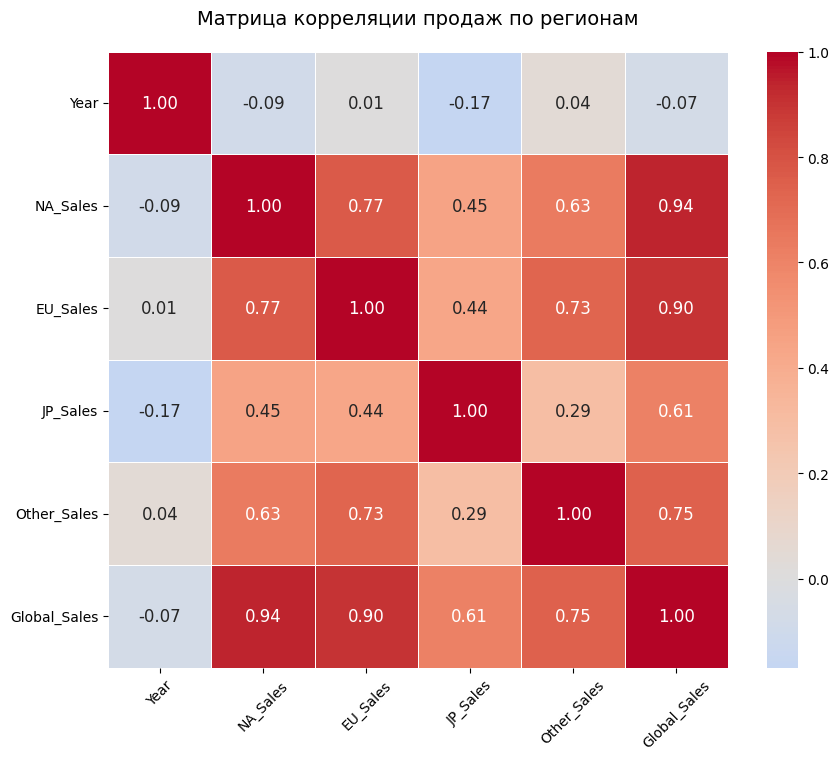

In [40]:
# Выделим числовые колонки для корреляции
numeric_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr_matrix = df[numeric_cols].corr()

# Создаем heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            annot_kws={"size": 12})

plt.title('Матрица корреляции продаж по регионам', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Самые сильные взаимосвязи:

NA_Sales и EU_Sales: 0.77 - очень сильная корреляция

NA_Sales и Global_Sales: 0.94 - почти линейная зависимость

EU_Sales и Global_Sales: 0.90 - очень сильная связь

Слабые/особые связи:

JP_Sales с другими регионами: 0.29-0.45 - слабая зависимость

JP_Sales и Global_Sales: 0.61 - умеренно слабая

**Ключевые выводы:**
Североамериканский рынок (NA) является ключевым драйвером глобальных продаж, что делает его приоритетным для издателей.

Европейский рынок (EU) тесно связан с североамериканским, что позволяет использовать схожие маркетинговые стратегии для этих регионов.

Японский рынок (JP) демонстрирует уникальное поведение (Слабая связь с другими регионами) и требует специальных подходов к локализации и продвижению.

**Рекомендации для издателей:**
При разработке игр ориентироваться в первую очередь на североамериканский рынок

Для японского рынка создавать отдельные продукты/локализации

Успех в Европе вероятен при успехе в Северной Америке (и наоборот)

# 5

**Основные результаты:**

Лидирующие жанры: Action, Sports и Shooter демонстрируют наибольшие продажи глобально, при этом:

Action — стабильно популярен во всех регионах

Sports — доминирует в Северной Америке и Европе

Role-Playing — ключевой жанр для Японии

Платформы-лидеры:

PS2 остается самой успешной платформой

Региональные различия:

NA и EU рынки коррелируют, оба любят Action/Sports

JP рынок уникален, предпочитает RPG и портативные платформы


**Применение результатов**

Для разработчиков игр:

Создавать Action/Shooter проекты для PlayStation — минимальный рыночный риск

Разрабатывать RPG при ориентации на японский рынок

Для издателей:

Инвестировать в локализацию RPG для западного рынка

Фокусировать маркетинг на NA/EU (дают 80%+ глобальных продаж)

Для JP рынка — партнерство с локальными студиями

Для маркетинга:

Использовать разные рекламные кампании для NA/EU и JP

Для инвесторов:

Вкладываться в студии, специализирующиеся на Action/RPG

Мониторить тренды мобильных платформ для азиатского рынка